In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_excel("hr_comma_sep.xlsx")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df= df.rename(columns= {'sales':'departments'})

In [4]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'departments', 'salary'],
      dtype='object')

In [5]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
departments               object
salary                    object
dtype: object

In [6]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
departments              0
salary                   0
dtype: int64

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [9]:
df.shape

(14999, 10)

In [10]:
df['departments'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [11]:
df['departments']= np.where(df['departments']== 'support', 'technical',df['departments'])
df['departments']= np.where(df['departments']== 'IT', 'technical', df['departments'])

In [12]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [13]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [14]:
df.groupby('departments').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
departments,,,,,,,,
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
technical,0.613687,0.720976,3.839054,201.813795,3.416127,0.144106,0.246924,0.008258


In [15]:
df.groupby('salary').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,
high,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205
low,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.296884,0.009021
medium,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.204313,0.028079


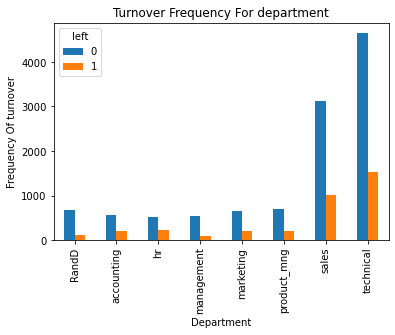

In [16]:
pd.crosstab(df.departments, df.left).plot(kind='bar')
plt.title('Turnover Frequency For department')
plt.xlabel('Department')
plt.ylabel('Frequency Of turnover')
plt.show()

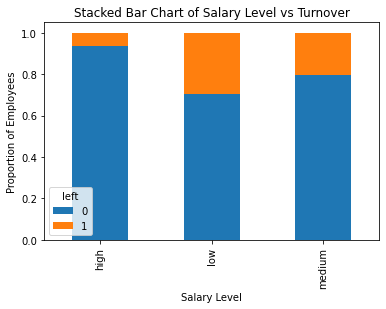

In [17]:
table=pd.crosstab(df.salary, df.left)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')

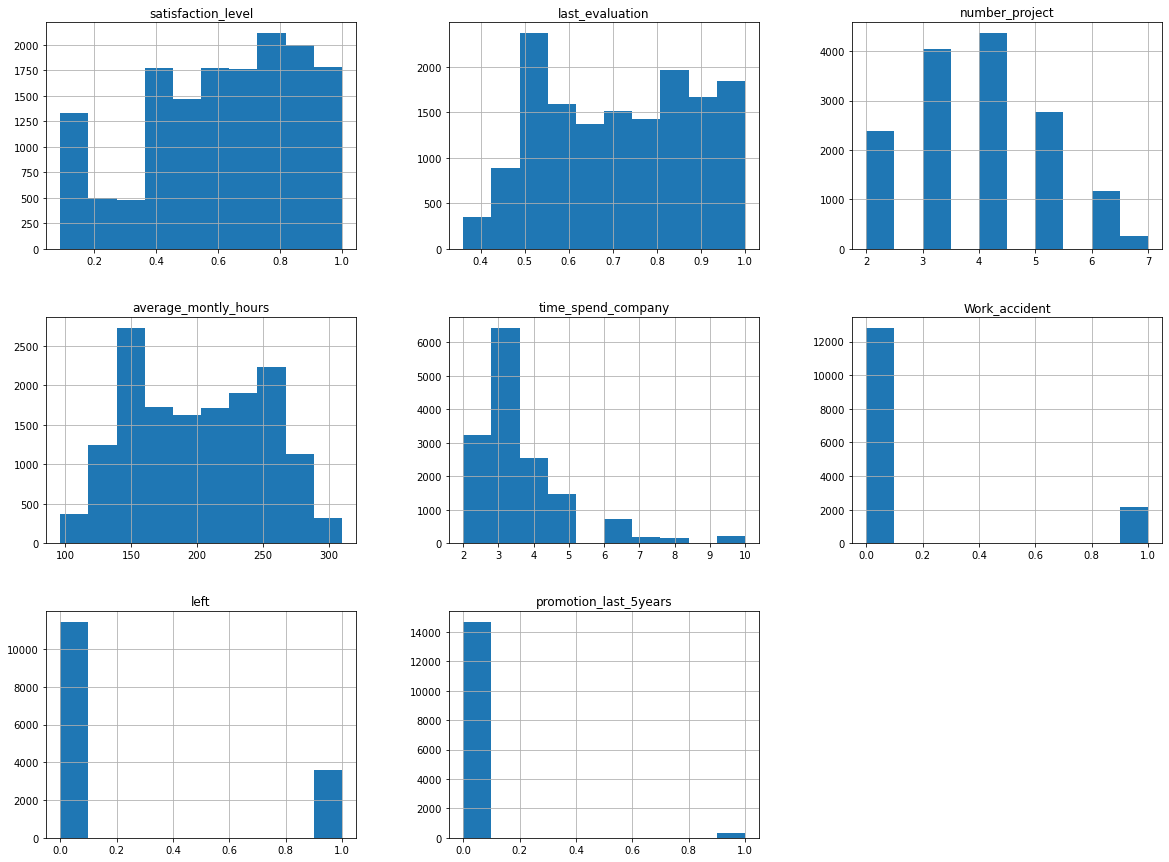

In [18]:
num_bins=10
df.hist(bins=num_bins, figsize = (20,15))

plt.show()

In [19]:
ctg_var = ['departments', 'salary']
for var in ctg_var:
    ctg_list= 'var'+ '_'+ var
    ctg_list= pd.get_dummies(df[var], prefix=var)
    
    df1= df.join(ctg_list)
    df= df1

In [20]:
df.drop(df.columns[[8,9]], axis=1, inplace=True)
df.columns.values

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'left', 'promotion_last_5years', 'departments_RandD',
       'departments_accounting', 'departments_hr',
       'departments_management', 'departments_marketing',
       'departments_product_mng', 'departments_sales',
       'departments_technical', 'salary_high', 'salary_low',
       'salary_medium'], dtype=object)

In [21]:
df_var= df.columns.values.tolist()
y=['left']
x= [i for i in df_var if i not in y]

In [22]:
print(x)

['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'departments_RandD', 'departments_accounting', 'departments_hr', 'departments_management', 'departments_marketing', 'departments_product_mng', 'departments_sales', 'departments_technical', 'salary_high', 'salary_low', 'salary_medium']


In [23]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

rfe= RFE(model, 10)
rfe= rfe.fit(df[x], df[y])
print(rfe.support_)
print(rfe.ranking_)

C:\Users\bhumi\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\bhumi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\bhumi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

[ True  True False False  True  True  True  True False  True  True False
 False False False  True  True False]
[1 1 3 9 1 1 1 1 5 1 1 6 8 7 4 1 1 2]


In [24]:
print(rfe.ranking_)

[1 1 3 9 1 1 1 1 5 1 1 6 8 7 4 1 1 2]


In [25]:
print(x)

['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'departments_RandD', 'departments_accounting', 'departments_hr', 'departments_management', 'departments_marketing', 'departments_product_mng', 'departments_sales', 'departments_technical', 'salary_high', 'salary_low', 'salary_medium']


In [26]:
cols = ['satisfaction_level', 'last_evaluation', 'time_spend_company','Work_accident', 'promotion_last_5years','departments_RandD',
        'departments_hr', 'departments_management','salary_high','salary_low']
x= df[cols]
y=df['left']

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
print('Logistic Regression accuracy:{:.3f}'.format(accuracy_score(y_test, logreg.predict(x_test))))

Logistic Regression accuracy:0.771


In [30]:
#------------------------------------------------------------------

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [32]:
print('Random Forest Accuracy:{:.3f}'.format(accuracy_score(y_test, rf.predict(x_test))))

Random Forest Accuracy:0.978


In [33]:
#-------------------------------------------------------------------

In [34]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train, y_train)

SVC()

In [35]:
print('Support Vector machine accuracy:{:.3f}'.format(accuracy_score(y_test, svc.predict(x_test))))

Support Vector machine accuracy:0.907


In [36]:
#-----------------------------------------------------------------

In [37]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)

modelCV = RandomForestClassifier()
scoring= 'accuracy'
results = model_selection.cross_val_score(modelCV, x_train , y_train, cv  =kfold, scoring= scoring)

print("10-fold cross validation average accuract : %.3f" % (results.mean()))

10-fold cross validation average accuract : 0.981


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3462
           1       0.95      0.96      0.95      1038

    accuracy                           0.98      4500
   macro avg       0.97      0.97      0.97      4500
weighted avg       0.98      0.98      0.98      4500



C:\Users\bhumi\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


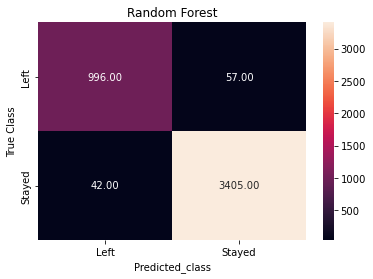

In [39]:
y_pred = rf.predict(x_test)
from sklearn.metrics import confusion_matrix


import seaborn as sns
forest_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])

sns.heatmap(forest_cm, annot=True, fmt= '.2f', xticklabels=["Left", "Stayed"], yticklabels =["Left", "Stayed"])

plt.ylabel('True Class')
plt.xlabel('Predicted_class')
plt.title('Random Forest')
plt.show()

In [40]:
print(classification_report(y_test, logreg.predict(x_test)))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      3462
           1       0.51      0.26      0.35      1038

    accuracy                           0.77      4500
   macro avg       0.66      0.59      0.60      4500
weighted avg       0.74      0.77      0.74      4500



C:\Users\bhumi\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


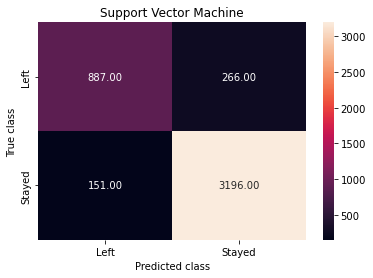

In [41]:
svc_y_pred = svc.predict(x_test)
svc_cm = metrics.confusion_matrix(svc_y_pred, y_test, [1,0] )
sns.heatmap(svc_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Support Vector Machine')
plt.savefig('support_vector_machine')

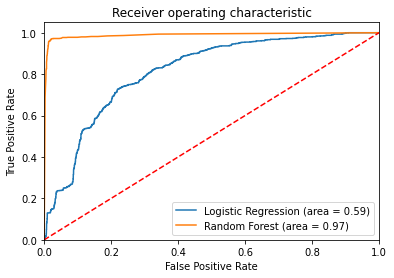

In [42]:
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, threshols = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])

rf_roc_auc = roc_auc_score(y_test, rf.predict(x_test))

rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

In [43]:
feature_labels = np.array(['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low'])
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

department_management-0.25%
promotion_last_5years-0.25%
department_hr-0.29%
department_RandD-0.32%
salary_high-0.69%
salary_low-1.13%
Work_accident-1.48%
last_evaluation-18.12%
time_spend_company-27.01%
satisfaction_level-50.45%
